In [4]:
import pandas as pd 

In [5]:
d18=pd.read_csv('Flow 2018/2018.csv',sep=';', decimal=',')

In [6]:
d18.head()

,DOMAINE,SOUS_DOMAINE,SOUS_DOMAINE_NIV2,SOUS_DOMAINE_NIV3,DOSSIER_CODE,DOSSIER_OBJET,TIERS_NOM,COMMUNE,COMMUNE_X,COMMUNE_Y,DOSSIER_DATE_NOTIFICATION,DOSSIER_DUREE,iNbDossiers,iOpÈrationCout,iMontantTotal
0,"D1-Energie, changement climatique, qualitÈ de ...",1BA-B‚timent,1BA.01-Performance ÈnergÈtique b‚timent,-,17GAC0007,Construction du groupe scolaire de Calvaire ‡ ...,COMMUNE DE BAIE-MAHAULT,Guadeloupe,-61.539650,16.198191,23/05/2018,36,1,719730.0,20586.0
1,"D1-Energie, changement climatique, qualitÈ de ...",1BA-B‚timent,1BA.01-Performance ÈnergÈtique b‚timent,-,17MAC0054,LaurÈat AAP RÈnovation B‚timent - RÈnovation È...,SA DE LA RAFFINERIE DES ANTILLES,Fort-de-France,-61.069188,14.641109,07/06/2018,26,1,488813.0,102154.0
2,"D1-Energie, changement climatique, qualitÈ de ...",1BA-B‚timent,1BA.01-Performance ÈnergÈtique b‚timent,-,17REC0125,Projet PREBAT UFR santÈ,UNIVERSITE DE LA REUNION,La RÈunion,55.532483,-21.133114,03/05/2018,36,1,14415686.0,194489.0
3,"D1-Energie, changement climatique, qualitÈ de ...",1BA-B‚timent,1BA.01-Performance ÈnergÈtique b‚timent,-,18GAC0013,AAP BATEX 2017 - RÈalisation de l'HÙtel Le RÈ...,COMPAGNIE D'EXPLOITATION HOTELIERE DES ABYMES ...,Guadeloupe,-61.539650,16.198191,26/11/2018,36,1,7429000.0,182100.0
4,"D1-Energie, changement climatique, qualitÈ de ...",1BA-B‚timent,1BA.01-Performance ÈnergÈtique b‚timent,-,18GAC0015,AAP BATEX 2017 - Construction du b‚timent CONF...,ELLAGUA,Guadeloupe,-61.539650,16.198191,27/07/2018,44,1,1418327.0,64511.0


In [7]:
d18=d18[['COMMUNE_X','COMMUNE_Y']]

In [8]:
d18=d18.dropna()

In [9]:
import matplotlib.pyplot as plt

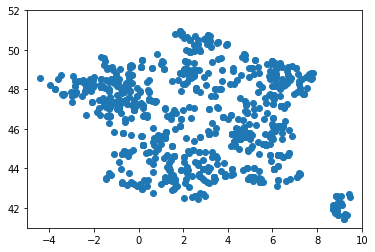

In [10]:
plt.scatter(d18.COMMUNE_X,d18.COMMUNE_Y)
plt.xlim((-5,10))
plt.ylim((41,52))
plt.show()

In [11]:
d19=pd.read_csv('Flow 2019/2019.csv',sep=';', decimal=',')
d19=d19[['COMMUNE_X','COMMUNE_Y']]

In [12]:
d19=d19.dropna()


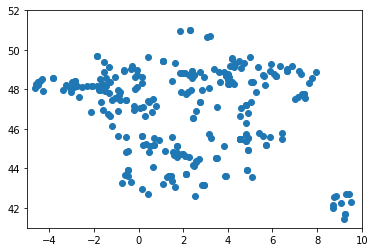

In [13]:
plt.scatter(d19.COMMUNE_X,d19.COMMUNE_Y)
plt.xlim((-5,10))
plt.ylim((41,52))
plt.show()

In [14]:
d16=pd.read_csv('Déchets 2016/etablissements.csv')

In [15]:
d16=d16[['Coordonnees_X','Coordonnees_Y']]

In [16]:
d16.head()

,Coordonnees_X,Coordonnees_Y
0,762639.0,1873015.0
1,481659.0,1802490.0
2,790678.0,2073093.0
3,548100.0,2637000.0
4,949818.0,2305514.0


In [18]:
from pyproj import Proj, transform

ModuleNotFoundError: No module named 'pyproj'

In [19]:
p1 = Proj(init='epsg:4326')
p2 = Proj(init='epsg:2154')  # coordonnées en Lambert 93
exp = (509411.0, 2494315.0)  # on prend les coordonnées de Rouen comme référence comme dans le notebook d'exemple sur le site

NameError: name 'Proj' is not defined

In [20]:
from tqdm import tqdm
summary = []
for i in tqdm(range(2000, 10000)):
    try:
        p2 = Proj(init='epsg:%d' % i)
    except RuntimeError:
        # does not exist
        continue
    try:
        res = transform(p1, p2, 1.059011, 49.434654)
    except RuntimeError:
        # impossible
        continue
    d = abs(res[0] - exp[0]) + abs(res[1] - exp[1])
    summary.append((d, i, res))
summary.sort()
summary[:10]

  0%|          | 0/8000 [00:00<?, ?it/s]


NameError: name 'Proj' is not defined

In [21]:
p2 = Proj(init='epsg:2192') #comme dans l'exemple le test renvoie 2192 ou 7401 comme valeurs les plus proches
long, lat =transform(p2, p1, d16.Coordonnees_X.values, d16.Coordonnees_Y.values)
d16['LLX']=long
d16['LLY']=lat

NameError: name 'Proj' is not defined

In [22]:
d16.head()

,Coordonnees_X,Coordonnees_Y
0,762639.0,1873015.0
1,481659.0,1802490.0
2,790678.0,2073093.0
3,548100.0,2637000.0
4,949818.0,2305514.0


In [23]:
plt.scatter(d16.LLX,d16.LLY)
plt.xlim((-5,10))
plt.ylim((41,52))
plt.show()

AttributeError: 'DataFrame' object has no attribute 'LLX'